In [1]:
import pandas as pd
import os
import datetime as dt

import statsmodels.api as sm
#from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acovf,pacf_yw,pacf_ols

import matplotlib.pyplot as plt

In [2]:
file_path = '{}/nem-data/nemde_clean/df_DUID_CO2_mean.pkl'.format(os.environ['HOME'])
df_mean = pd.read_pickle(file_path)
print(df_mean.shape)
df_mean.head()

(1060704, 2)


,Price,CO2E_EMISSIONS_FACTOR
2019-08-01 03:55:00,79.52391,0.380340
2019-08-01 03:50:00,79.17710,0.456409
2019-08-01 03:45:00,85.14416,0.573436
2019-08-01 03:40:00,84.78689,0.573436
2019-08-01 03:35:00,84.78346,0.573436


In [3]:
df_mean1 = df_mean[(df_mean.index < dt.datetime(2017,5,31,0,0,0))] # training dataset
df_mean2 = df_mean[(df_mean.index > dt.datetime(2018,10,1))] #dataset including complete month with NaNs

In [4]:
df_mean1.index.max()

Timestamp('2017-05-30 23:55:00')

In [5]:
df_mean1.isna().any()

Price                    True
CO2E_EMISSIONS_FACTOR    True
dtype: bool

In [6]:
#exchange NaNs by -1 as else plot_(p)acf not possible

df_mean1.CO2E_EMISSIONS_FACTOR.fillna(value=df_mean1.CO2E_EMISSIONS_FACTOR.median(),inplace=True)
df_mean2.CO2E_EMISSIONS_FACTOR.fillna(value=-1,inplace=True)

/home/bastian/Environment/DSR_portfolio/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### __acf over complete training dataset__

In [7]:
df_mean1.isna().any()

Price                     True
CO2E_EMISSIONS_FACTOR    False
dtype: bool

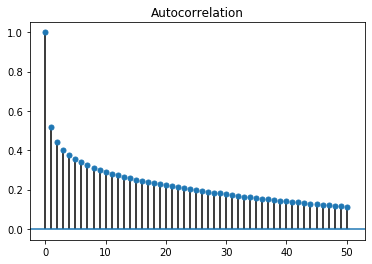

In [8]:
plot_acf(df_mean1.CO2E_EMISSIONS_FACTOR,lags=50);
file_path = '{}/Desktop/Portfolio_project/presentation/acf'.format(os.environ['HOME'])
plt.savefig(file_path)

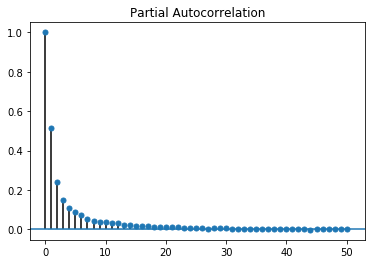

In [9]:
plot_pacf(df_mean1.CO2E_EMISSIONS_FACTOR,lags=50);
file_path = '{}/Desktop/Portfolio_project/presentation/pacf'.format(os.environ['HOME'])
plt.savefig(file_path)

### __acf containing 2 complete months with NaNs where NaN == -1__

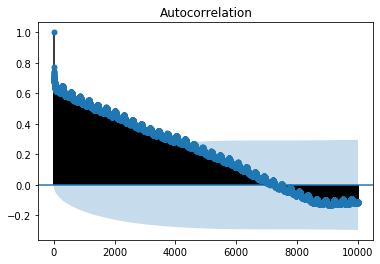

In [8]:
#note: the fact that NaNs were replaced by -1 appears to play a significant role in acf
plot_acf(df_mean2.CO2E_EMISSIONS_FACTOR,lags=10000);

### __examining training dataset one time differenced__

In [12]:
df3 = df_mean1
df3["CO2_diff1"] = df3.CO2E_EMISSIONS_FACTOR - df3.CO2E_EMISSIONS_FACTOR.shift(1)
df3.dropna(inplace=True)
df3.head()

/home/bastian/Environment/DSR_portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/bastian/Environment/DSR_portfolio/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Price,CO2E_EMISSIONS_FACTOR,CO2_diff1
2017-05-30 23:45:00,124.99000,0.690287,0.235215
2017-05-30 23:40:00,124.99005,0.688003,-0.002284
2017-05-30 23:35:00,124.99005,0.688003,0.000000
2017-05-30 23:30:00,126.76572,0.376381,-0.311622
2017-05-30 23:25:00,122.35801,0.585784,0.209404


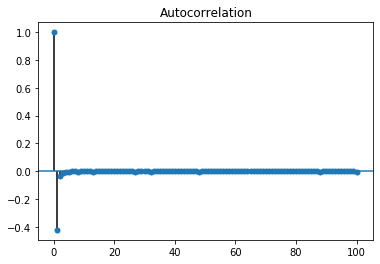

In [13]:
plot_acf(df3.CO2_diff1,lags=100);  #this suggests a MA(1) process

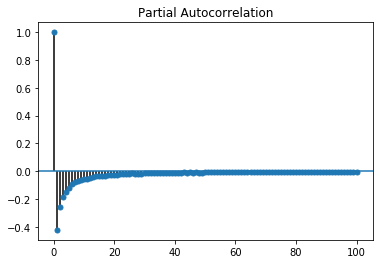

In [14]:
plot_pacf(df3.CO2_diff1,lags=100); #might be typical for an MA1 process

### __plotting out high-res data representation__

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [43]:
df_mean.index[:576]

DatetimeIndex(['2019-08-01 03:55:00', '2019-08-01 03:50:00',
               '2019-08-01 03:45:00', '2019-08-01 03:40:00',
               '2019-08-01 03:35:00', '2019-08-01 03:30:00',
               '2019-08-01 03:25:00', '2019-08-01 03:20:00',
               '2019-08-01 03:15:00', '2019-08-01 03:10:00',
               ...
               '2019-07-30 04:45:00', '2019-07-30 04:40:00',
               '2019-07-30 04:35:00', '2019-07-30 04:30:00',
               '2019-07-30 04:25:00', '2019-07-30 04:20:00',
               '2019-07-30 04:15:00', '2019-07-30 04:10:00',
               '2019-07-30 04:05:00', '2019-07-30 04:00:00'],
              dtype='datetime64[ns]', length=576, freq='-5T')

### __Seaborn__

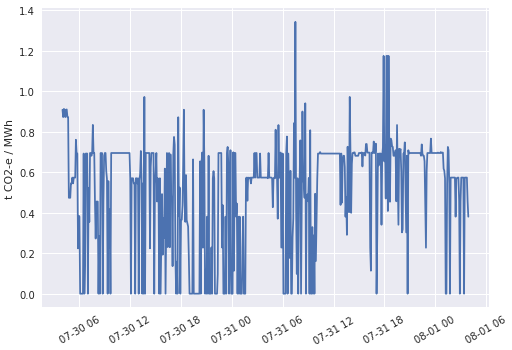

In [54]:
#plt.figure(figsize=(15,15))

fig = sns.lineplot(df_mean.index[:576], df_mean.CO2E_EMISSIONS_FACTOR.iloc[:576])
fig.set_ylabel("t CO2-e / MWh")


fig.format_xdata = mdates.DateFormatter('%Y-%m-%d')

for i in fig.get_xticklabels():
    i.set_rotation(30)

file_path = '{}/Desktop/Portfolio_project/presentation/over_48h.png'.format(os.environ['HOME'])
plt.savefig(file_path)

sns.set_style("whitegrid")

### __Matplotlib__

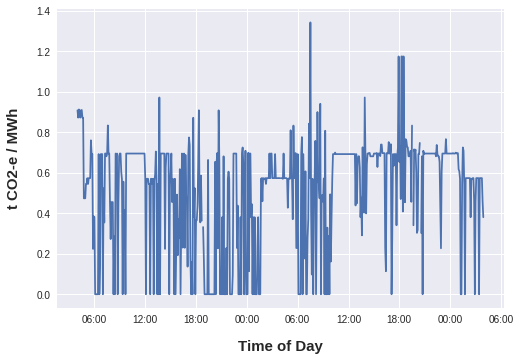

In [77]:
fig = plt.plot_date(df_mean.index[:576], df_mean.CO2E_EMISSIONS_FACTOR.iloc[:576], linestyle='solid', marker=None)

plt.xlabel("Time of Day", labelpad=15, fontsize=15, fontweight='bold')
plt.ylabel("t CO2-e / MWh", labelpad=15, fontsize=15, fontweight='bold')

date_format = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

plt.style.use('seaborn')

file_path = '{}/Desktop/Portfolio_project/presentation/over_48h.png'.format(os.environ['HOME'])
plt.savefig(file_path)

In [1]:
from pandas.plotting import autocorrelation_plot

In [ ]:
autocorrelation_plot(df_mean1.CO2E_EMISSIONS_FACTOR, )
pyplot.show()